We study the following setup

$$
\begin{align}
Y &\sim \mathrm{Unif}(\{\pm1\}) \\
X | Y &\sim \mathcal{N}(Y \cdot c \cdot \mathbf{e_1}, I_d).
\end{align}
$$

We let our adversary perturb inputs up to $\epsilon$ in L2-norm.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
def Q(x):
    return 1 - scipy.stats.norm.cdf(x)

def natErr(c, cos_theta):
    return Q(c * cos_theta)

def advErr(c, eps, cos_theta):
    return Q(c * cos_theta - eps)

def natAdvErrs(c, eps, cos_theta):
    return np.stack((
        natErr(c=c, cos_theta=cos_theta),
        advErr(c=c, eps=eps, cos_theta=cos_theta)
    ), axis=-1)

natAdvErrs(2, 0, np.cos(0)), natAdvErrs(2, 10, np.cos(0))

(array([0.02275013, 0.02275013]), array([0.02275013, 1.        ]))

In [3]:
def plot_pts(cs, epss, thetas, **plt_kwargs):
    for eps in epss:
        for c in cs:
            pts = natAdvErrs(c, eps, np.cos(thetas))
            plt.plot(pts[:, 0], pts[:, 1], label=f"c={c}; eps={eps}", **plt_kwargs)

### Varying c

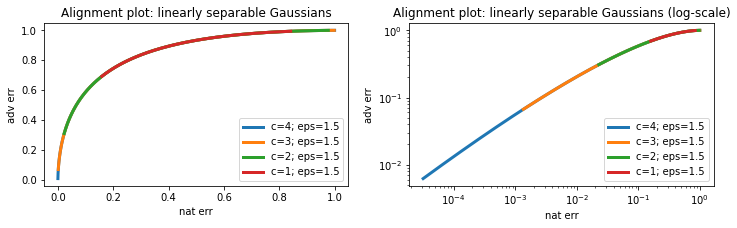

In [4]:
CS = [4, 3, 2, 1]
EPSS = [1.5]
THETAS = np.linspace(start=0, stop=np.pi, num=256)

def plt_main():
    plot_pts(cs=CS, epss=EPSS, thetas=THETAS, lw=3);
    plt.legend(bbox_to_anchor=(1, 0), loc='lower right', ncol=1);
    plt.xlabel("nat err");
    plt.ylabel("adv err");

plt.figure(figsize=(12, 3));

plt.subplot(1, 2, 1);
plt_main();
plt.title("Alignment plot: linearly separable Gaussians");

plt.subplot(1, 2, 2);
plt_main();
plt.xscale("log"); plt.yscale("log");
plt.title("Alignment plot: linearly separable Gaussians (log-scale)");

### Varying eps

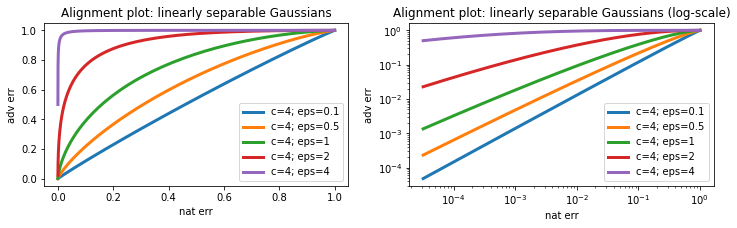

In [5]:
THETAS = np.linspace(start=0, stop=np.pi, num=256)
CS = [4]
EPSS = [0.1, 0.5, 1, 2, 4]

def plt_main():
    plot_pts(cs=CS, epss=EPSS, thetas=THETAS, lw=3);
    plt.legend(bbox_to_anchor=(1, 0), loc='lower right', ncol=1);
    plt.xlabel("nat err");
    plt.ylabel("adv err");

plt.figure(figsize=(12, 3));

plt.subplot(1, 2, 1);
plt_main();
plt.title("Alignment plot: linearly separable Gaussians");

plt.subplot(1, 2, 2);
plt_main();
plt.xscale("log"); plt.yscale("log");
plt.title("Alignment plot: linearly separable Gaussians (log-scale)");

Even though natura and error are monotonically aligned,
for large epsilon perturbations,
adversarial error is much harder to minimize than natural error.

Note that dimension does not impact alignment in the infinite sample regime.
That is to say, the set of possible performances is independent of dimension.